In [2]:
# import packages 
import numpy as np 

import h5py
import os
import re

from scipy import stats
from scipy import signal
import scipy.optimize


import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
import matplotlib as mpl
import matplotlib.cm as mpl_cm
import matplotlib.colors as mpl_colors
import matplotlib.offsetbox as mpl_offsetbox
import matplotlib.gridspec as mpl_gridspec

import skimage

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# change font
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "Arial"
mpl.rcParams.update({'font.size': 6.5})

print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.sans-serif'])
print(mpl.rcParams['font.size'])

['Arial']
['Arial']
6.5


In [3]:
# Save progress 
HISTORY_FILEPATH = r"\\10.254.8.27\JILAB3-Quota\Jian\Backup\JupyterNotebookBackup\VolPyMaskInvestigation_Ver01-Copy.py"
LAST_SAVE_TIME = 0
SAVE_INTERVAL_S = 30*60
def SAVE_PROGRESS(dst_file_path):
    global LAST_SAVE_TIME, SAVE_INTERVAL_S
    import time
    cur_time = time.time()
    if (cur_time - LAST_SAVE_TIME) < SAVE_INTERVAL_S:
        print(f"Time since last sync = {(cur_time - LAST_SAVE_TIME):0.2f} s" )
        return
    LAST_SAVE_TIME = cur_time
    try:
        from datetime import datetime
        dst_dir_path, dst_file_name = os.path.split(dst_file_path)
        dst_file_name = os.path.splitext(dst_file_name)[0] + "_" + datetime.today().strftime('%Y-%m-%d') + os.path.splitext(dst_file_name)[1]
        dst_file_path = os.path.join(dst_dir_path, dst_file_name)
        if not os.path.isdir(dst_dir_path):
            os.makedirs(dst_dir_path)
        if os.path.exists(dst_file_path):
            os.remove(dst_file_path)
        %history -t -g -f $dst_file_path
        print("Progress saved to: " + dst_file_path)
    except Exception as e:
        print("Progress sync failed, error: ",e)

In [194]:
src_volpy_res_hdf5_file_path = r"J:\2023-10-10\M377_JEDI2P\FOV03\Group01\Olympus25X_M377_JEDI2P_FOV03_Group01_TS_CH0_CHA_F12_Pkg\VolpyResults_Ver01\results.hdf5"
src_data_path = r"J:\2023-10-10\M377_JEDI2P\FOV03\Group01\Olympus25X_M377_JEDI2P_FOV03_Group01_TS_CH0_CHA_F12_Pkg\MotionReg\motion_reg.tif"
src_hand_draw_roi_path = r"J:\2023-10-10\M377_JEDI2P\FOV03\Group01\TemplateROI\Masks.tif"

SAVE_PROGRESS(HISTORY_FILEPATH)  

Time since last sync = 1380.34 s


(3100, 500, 400)


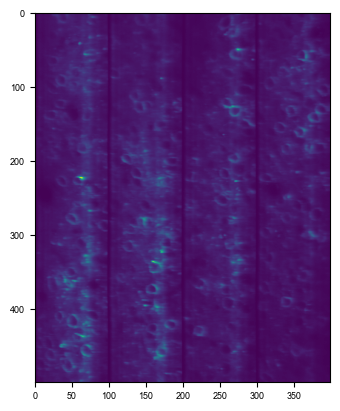

Time since last sync = 1382.67 s


In [196]:
# load src data 

src_data_stack = skimage.io.imread(src_data_path)

print(src_data_stack.shape)

plt.figure()
plt.imshow(np.mean(src_data_stack,axis = 0))
plt.show()

SAVE_PROGRESS(HISTORY_FILEPATH)  

In [197]:
# load src hand draw roi
hand_draw_masks = skimage.io.imread(src_hand_draw_roi_path)
print(hand_draw_masks.shape)

(202, 500, 400)


(10,)


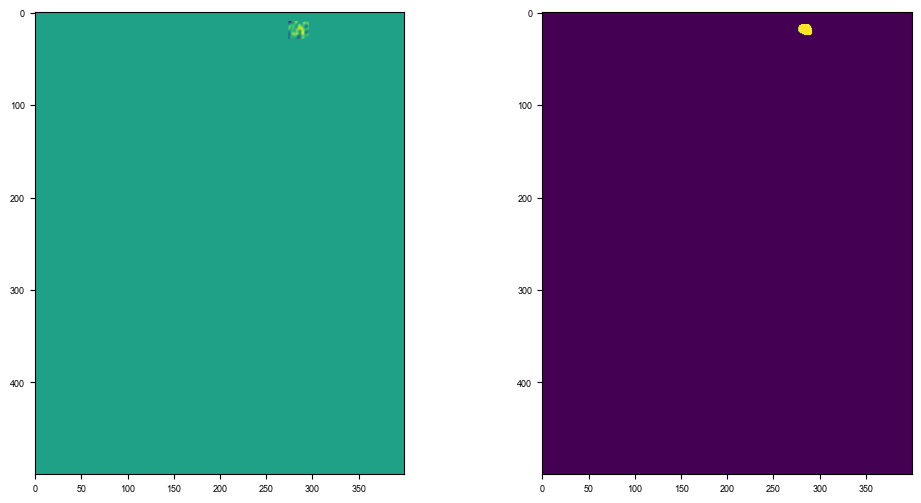

(3100,)


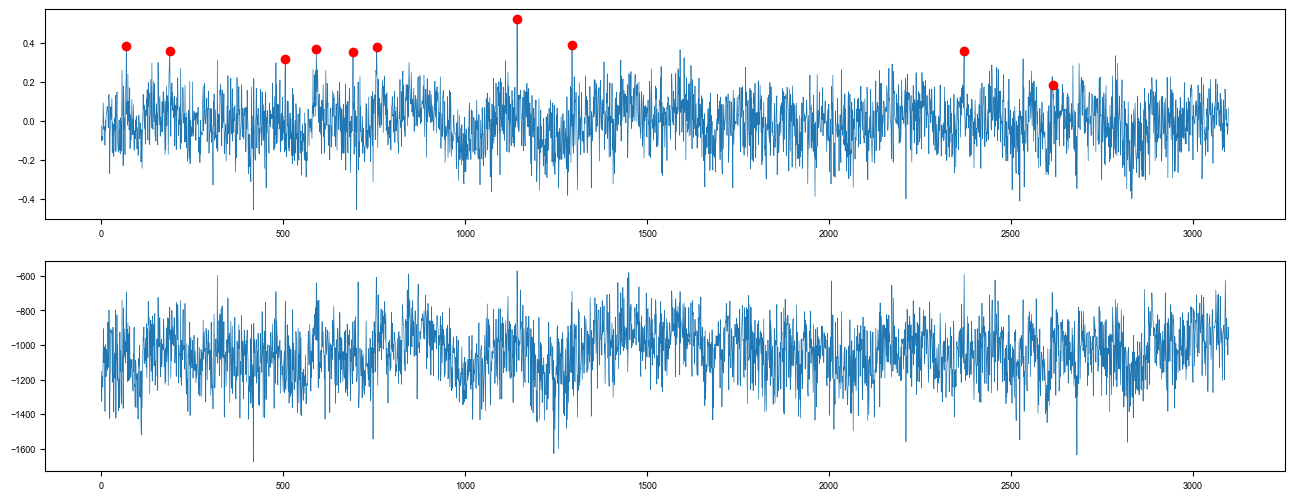

In [198]:
test_roi_idx = 184

test_weights = None
test_volpytrace = None
test_dFF = None
test_F0 = None
test_spikes = None

test_handdraw_roi = hand_draw_masks[test_roi_idx,:,:]

with h5py.File(src_volpy_res_hdf5_file_path, "r") as hdf5_file:
    # print(hdf5_file.keys())
    test_weights = hdf5_file[f"roi{test_roi_idx}\\volpy_estimates\\weights"][()]
    # test_weights[test_weights<0] = 0
    test_volpytrace = hdf5_file[f"roi{test_roi_idx}\\volpy_estimates\\ts"][()]
    test_dFF =  hdf5_file[f"roi{test_roi_idx}\\volpy_estimates\\dFF"][()]
    test_F0 = hdf5_file[f"roi{test_roi_idx}\\volpy_estimates\\F0"][()]
    test_spikes = hdf5_file[f"roi{test_roi_idx}\\stdThreshold\\spikes_valid"][()]
    

print(test_spikes.shape)

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.imshow(test_weights)
# plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(test_handdraw_roi)
# plt.colorbar()
plt.show()

input_mask = test_weights.copy()
# input_mask[input_mask < 0] = 0

handdraw_roi_trace = np.mean(src_data_stack[:, test_handdraw_roi > 0], axis = -1)
print(handdraw_roi_trace.shape)

# test_trace = np.mean(src_data_stack * input_mask[np.newaxis,...], axis = (-1,-2))
test_trace = np.sum(src_data_stack * input_mask[np.newaxis,...], axis = (-1,-2))

plt.figure(figsize = (16,6))
plt.subplot(2,1,1)
plt.plot(test_dFF,
        linewidth = 0.5)
plt.plot(test_spikes, test_dFF[test_spikes], "ro")
plt.subplot(2,1,2)
plt.plot(-handdraw_roi_trace,
        linewidth = 0.5)
plt.show()


In [289]:
test_roi_idx = 9

test_weights = None
test_volpytrace = None
test_dFF = None
test_F0 = None

test_handdraw_roi = hand_draw_masks[test_roi_idx,:,:]

with h5py.File(src_volpy_res_hdf5_file_path, "r") as hdf5_file:
    # print(hdf5_file.keys())
    test_weights = hdf5_file[f"roi{test_roi_idx}\\volpy_estimates\\weights"][()]
    test_volpytrace = hdf5_file[f"roi{test_roi_idx}\\volpy_estimates\\ts"][()]
    test_dFF =  hdf5_file[f"roi{test_roi_idx}\\volpy_estimates\\dFF"][()]
    test_F0 = hdf5_file[f"roi{test_roi_idx}\\volpy_estimates\\F0"][()]
    
    # test_weights[test_weights<0] = 0

SAVE_PROGRESS(HISTORY_FILEPATH)  

Time since last sync = 513.81 s


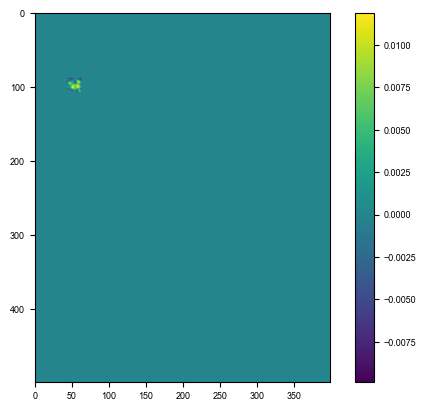

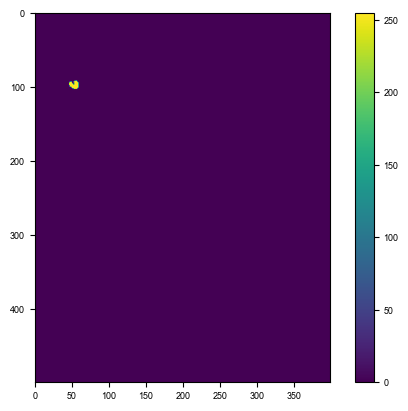

0.8817857279391319
-0.009883338585495949
0.011893924325704575
Time since last sync = 341.00 s


In [51]:
plt.figure()
plt.imshow(test_weights)
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(test_handdraw_roi)
plt.colorbar()
plt.show()

print(np.sum(test_weights))
print(np.min(test_weights))
print(np.max(test_weights))

SAVE_PROGRESS(HISTORY_FILEPATH)  

In [52]:
# src_trace 

input_mask = test_weights.copy()
# input_mask[input_mask < 0] = 0

handdraw_roi_trace = np.mean(src_data_stack[:, test_handdraw_roi > 0], axis = -1)
print(handdraw_roi_trace.shape)

# test_trace = np.mean(src_data_stack * input_mask[np.newaxis,...], axis = (-1,-2))
test_trace = np.sum(src_data_stack * input_mask[np.newaxis,...], axis = (-1,-2))

SAVE_PROGRESS(HISTORY_FILEPATH)  

(3100,)
Time since last sync = 343.75 s


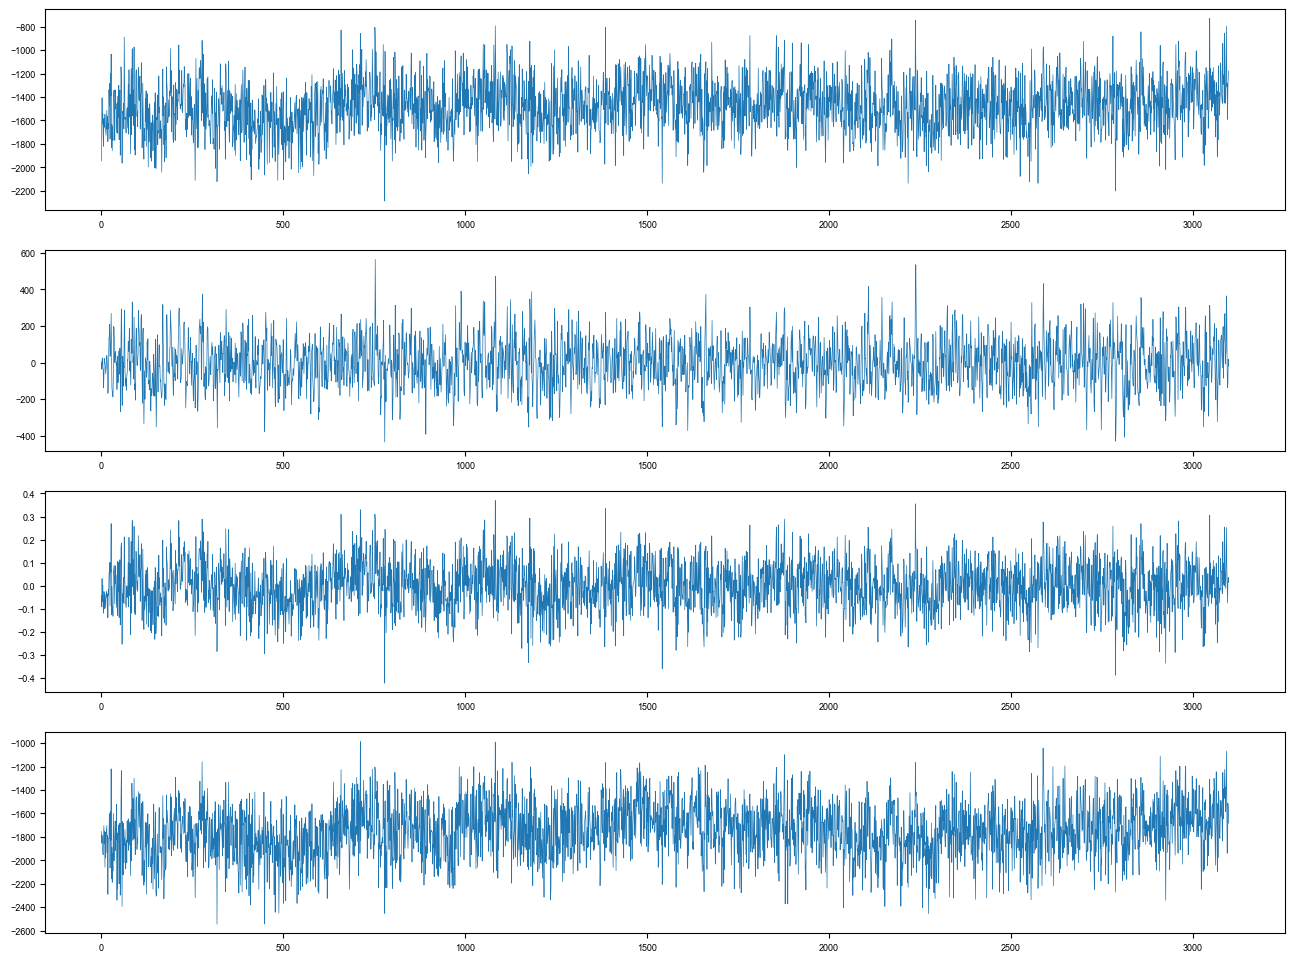

Time since last sync = 344.34 s


In [53]:
plt.figure(figsize = (16,12))
plt.subplot(4,1,1)
plt.plot(-test_trace,
        linewidth = 0.5)
plt.subplot(4,1,2)
plt.plot(test_volpytrace,
        linewidth = 0.5)
plt.subplot(4,1,3)
plt.plot(test_dFF,
        linewidth = 0.5)
plt.subplot(4,1,4)
plt.plot(-handdraw_roi_trace,
        linewidth = 0.5)
plt.show()

SAVE_PROGRESS(HISTORY_FILEPATH)  

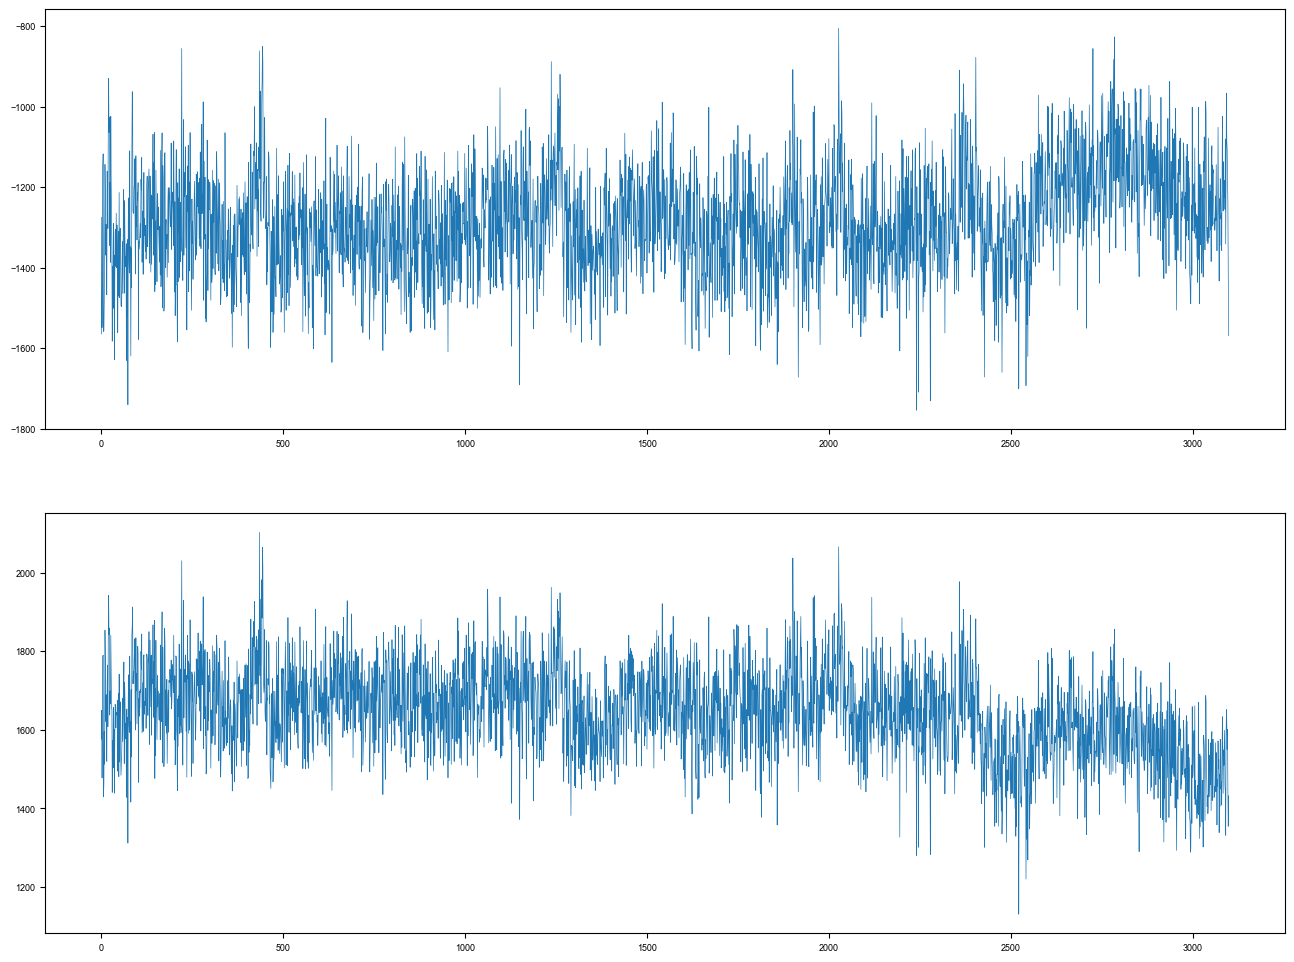

Time since last sync = 443.31 s


In [25]:
plt.figure(figsize = (16,12))
plt.subplot(2,1,1)
plt.plot(-test_trace,
        linewidth = 0.5)
plt.subplot(2,1,2)
plt.plot(test_dFF * test_F0 + test_F0,
        linewidth = 0.5)
plt.show()

SAVE_PROGRESS(HISTORY_FILEPATH)  

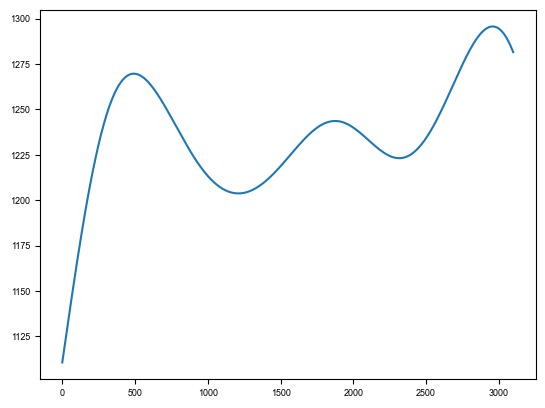

In [45]:
plt.figure()
plt.plot(test_F0)
plt.show()

In [16]:
# # extract volpy masks

# roi_regex = r"roi\d+"

# volpy_masks = None

# with h5py.File(src_volpy_res_hdf5_file_path, "r") as hdf5_file:
#     # print(hdf5_file.keys())
#     max_roi_num = 0
#     for key in hdf5_file.keys():
#         for istr in re.findall(roi_regex, key):
#             cur_roi_num = int(istr[3:])
#             max_roi_num = max(max_roi_num, cur_roi_num)
#     nof_rois = max_roi_num + 1
    
#     i_roi = 0
#     mask_height, mask_width = hdf5_file[f"roi{i_roi}\\volpy_estimates\\weights"][()].shape
#     volpy_masks = np.zeros((nof_rois, mask_height, mask_width), dtype = float)
#     for i_roi in range(nof_rois):
#         volpy_masks[i_roi, :, :] = hdf5_file[f"roi{i_roi}\\volpy_estimates\\weights"][()]

# dst_dir_path = os.path.split(src_volpy_res_hdf5_file_path)[0]

# if not os.path.isdir(dst_dir_path):
#     os.makedirs(dst_dir_path)
                             
# dst_mask_file_name = "refined_mask.tif"
# dst_mask_file_path = os.path.join(dst_dir_path, dst_mask_file_name)

# skimage.io.imsave(dst_mask_file_path, volpy_masks)

# dst_mask_nonnegative = volpy_masks.copy()
# dst_mask_nonnegative[dst_mask_nonnegative < 0] = 0

# dst_mask_file_name = "refine_nonneg_mask.tif"
# dst_mask_file_path = os.path.join(dst_dir_path, dst_mask_file_name)

# skimage.io.imsave(dst_mask_file_path, dst_mask_nonnegative)


# print("mask saved to: " +  dst_mask_file_path)

# SAVE_PROGRESS(HISTORY_FILEPATH)  

C:\Users\zhong\AppData\Local\Temp\ipykernel_26628\4032731013.py:30: UserWarning: L:\2023-11-02\Olympus25X\M377\FOV03\Group06\Olympus25X_M377_4LargeFOV_FOV03_Group06_TS_CH0_CHA_F0_Pkg\VolpyResults_VolpyDefaultSettingsSTDWin20\refined_mask.tif is a low contrast image
  skimage.io.imsave(dst_mask_file_path, volpy_masks)
C:\Users\zhong\AppData\Local\Temp\ipykernel_26628\4032731013.py:38: UserWarning: L:\2023-11-02\Olympus25X\M377\FOV03\Group06\Olympus25X_M377_4LargeFOV_FOV03_Group06_TS_CH0_CHA_F0_Pkg\VolpyResults_VolpyDefaultSettingsSTDWin20\refine_nonneg_mask.tif is a low contrast image
  skimage.io.imsave(dst_mask_file_path, dst_mask_nonnegative)


mask saved to: L:\2023-11-02\Olympus25X\M377\FOV03\Group06\Olympus25X_M377_4LargeFOV_FOV03_Group06_TS_CH0_CHA_F0_Pkg\VolpyResults_VolpyDefaultSettingsSTDWin20\refine_nonneg_mask.tif
Time since last sync = 160.75 s
